In [107]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import missingno as msno
from worldBank.data_processing import DataProcessing

In [109]:
data = pd.read_csv("./data/CountryWorldBank.csv")
world_bank = DataProcessing(data=data)

In [110]:
data.head(5)

Country  Access to electricity (% of population)  \
0     Afghanistan                                     97.7   
1         Albania                                    100.0   
2         Algeria                                     99.7   
3  American Samoa                                      NaN   
4         Andorra                                    100.0   

   Birth rate, crude (per 1,000 people)  \
0                                36.051   
1                                10.285   
2                                22.431   
3                                12.700   
4                                   NaN   

   Domestic private health expenditure (% of current health expenditure)  \
0                                          76.231537                       
1                                          59.477894                       
2                                          38.965740                       
3                                                NaN                       
4                                          27.383091                       

   Educational attainment, at least completed lower secondary, population 25+, female (%) (cumulative)  \
0                                           7.339715                                                     
1                                                NaN                                                     
2                                                NaN                                                     
3                                                NaN                                                     
4                                                NaN                                                     

   Expense (% of GDP)  Fertility rate, total (births per woman)  \
0                 NaN                                     4.750   
1           24.604816                                     1.400   
2                 NaN                                     2.942   
3                 NaN                                       NaN   
4                 NaN                                       NaN   

   Fixed broadband subscriptions (per 100 people)  GDP (current US$)  \
0                                        0.068008       1.995593e+10   
1                                       17.720900       1.524146e+10   
2                                        8.606450       1.650000e+11   
3                                             NaN       7.210000e+08   
4                                       48.656000       2.891001e+09   

   GDP per capita (current US$)  ...  Military expenditure (current USD)  \
0                    510.787063  ...                        2.795770e+08   
1                   5370.778623  ...                        1.965963e+08   
2                   3743.541952  ...                        9.708277e+09   
3                  14489.258660  ...                                 NaN   
4                  37361.090070  ...                                 NaN   

   Mobile cellular subscriptions (per 100 people)  Net migration  \
0                                       58.190214         143634   
1                                       91.350501         -16680   
2                                      104.842178         -10798   
3                                             NaN           -653   
4                                      103.449163            572   

   Population ages 65 and above (% of total population)  \
0                                           2.370734      
1                                          14.767004      
2                                           5.894089      
3                                           6.365363      
4                                          14.216852      

   Proportion of seats held by women in national parliaments (%)  \
0                                          27.016129               
1                                          29.508197               
2                      

In [111]:
data.describe()

Access to electricity (% of population)  \
count                               215.000000   
mean                                 86.691163   
std                                  24.102101   
min                                   7.300000   
25%                                  86.200000   
50%                                 100.000000   
75%                                 100.000000   
max                                 100.000000   

       Birth rate, crude (per 1,000 people)  \
count                            214.000000   
mean                              18.680532   
std                                9.724461   
min                                5.300000   
25%                               10.587250   
50%                               15.666500   
75%                               25.811500   
max                               45.588000   

       Domestic private health expenditure (% of current health expenditure)  \
count                                         187.000000                       
mean                                           36.754729                       
std                                            18.667494                       
min                                             2.661578                       
25%                                            22.901363                       
50%                                            35.700000                       
75%                                            49.137899                       
max                                            82.094597                       

       Educational attainment, at least completed lower secondary, population 25+, female (%) (cumulative)  \
count                                         101.000000                                                     
mean                                           73.134617                                                     
std                                            24.235934                                                     
min                                             1.645413                                                     
25%                                            58.080002                                                     
50%                                            81.139999                                                     
75%                                            94.483398                                                     
max                                            99.843040                                                     

       Expense (% of GDP)  Fertility rate, total (births per woman)  \
count          137.000000                                211.000000   
mean            30.686727                                  2.525814   
std             14.074163                                  1.273488   
min              0.000213                                  0.837000   
25%             20.164783                                  1.557500   
50%             29.928140                                  2.050000   
75%             39.046477                                  3.257000   
max            103.725787                                  6.892000   

       Fixed broadband subscriptions (per 100 people)  GDP (current US$)  \
count                                      201.000000       2.090000e+02   
mean                                        16.388181       4.058013e+11   
std                                         15.362499       1.871490e+12   
min                                          0.000000       5.174659e+07   
25%                                          1.672110       6.684226e+09   
50%                                         11.765000       2.534353e+10   
75%                                         29.314100       1.710000e+11   
max                                         58.079200       2.140000e+13   

       GDP per capita (current US$)  Government Effectiveness: Estimate  ...  \
count          

In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 28 columns):
 #   Column                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                --------------  -----  
 0   Country                                                                                               217 non-null    object 
 1   Access to electricity (% of population)                                                               215 non-null    float64
 2   Birth rate, crude (per 1,000 people)                                                                  214 non-null    float64
 3   Domestic private health expenditure (% of current health expenditure)                                 187 non-null    float64
 4   Educational attainment, at least completed lower secondary, population 25+, female (%) (cumulative)   10

In [113]:
# Check duplicates
data.duplicated().sum()

0

## Missing Data

In [114]:
missing_percentage = world_bank.missing_values()

                                                    Missing Count  \
Literacy rate, adult total (% of people ages 15...            183   
Unemployment with basic education (% of total l...            117   
Educational attainment, at least completed lowe...            116   
Intentional homicides (per 100,000 people)                     91   
Expense (% of GDP)                                             80   
Military expenditure (current USD)                             63   
Gross savings (% of GDP)                                       58   
Refugee population by country or territory of a...             54   
Total reserves minus gold (current US$)                        48   
Gross national expenditure (% of GDP)                          46   
Human capital index (HCI) (scale 0-1)                          43   
Total alcohol consumption per capita (liters of...             32   
Labor force participation rate, total (% of tot...             30   
Domestic private health expenditur

<Axes: >

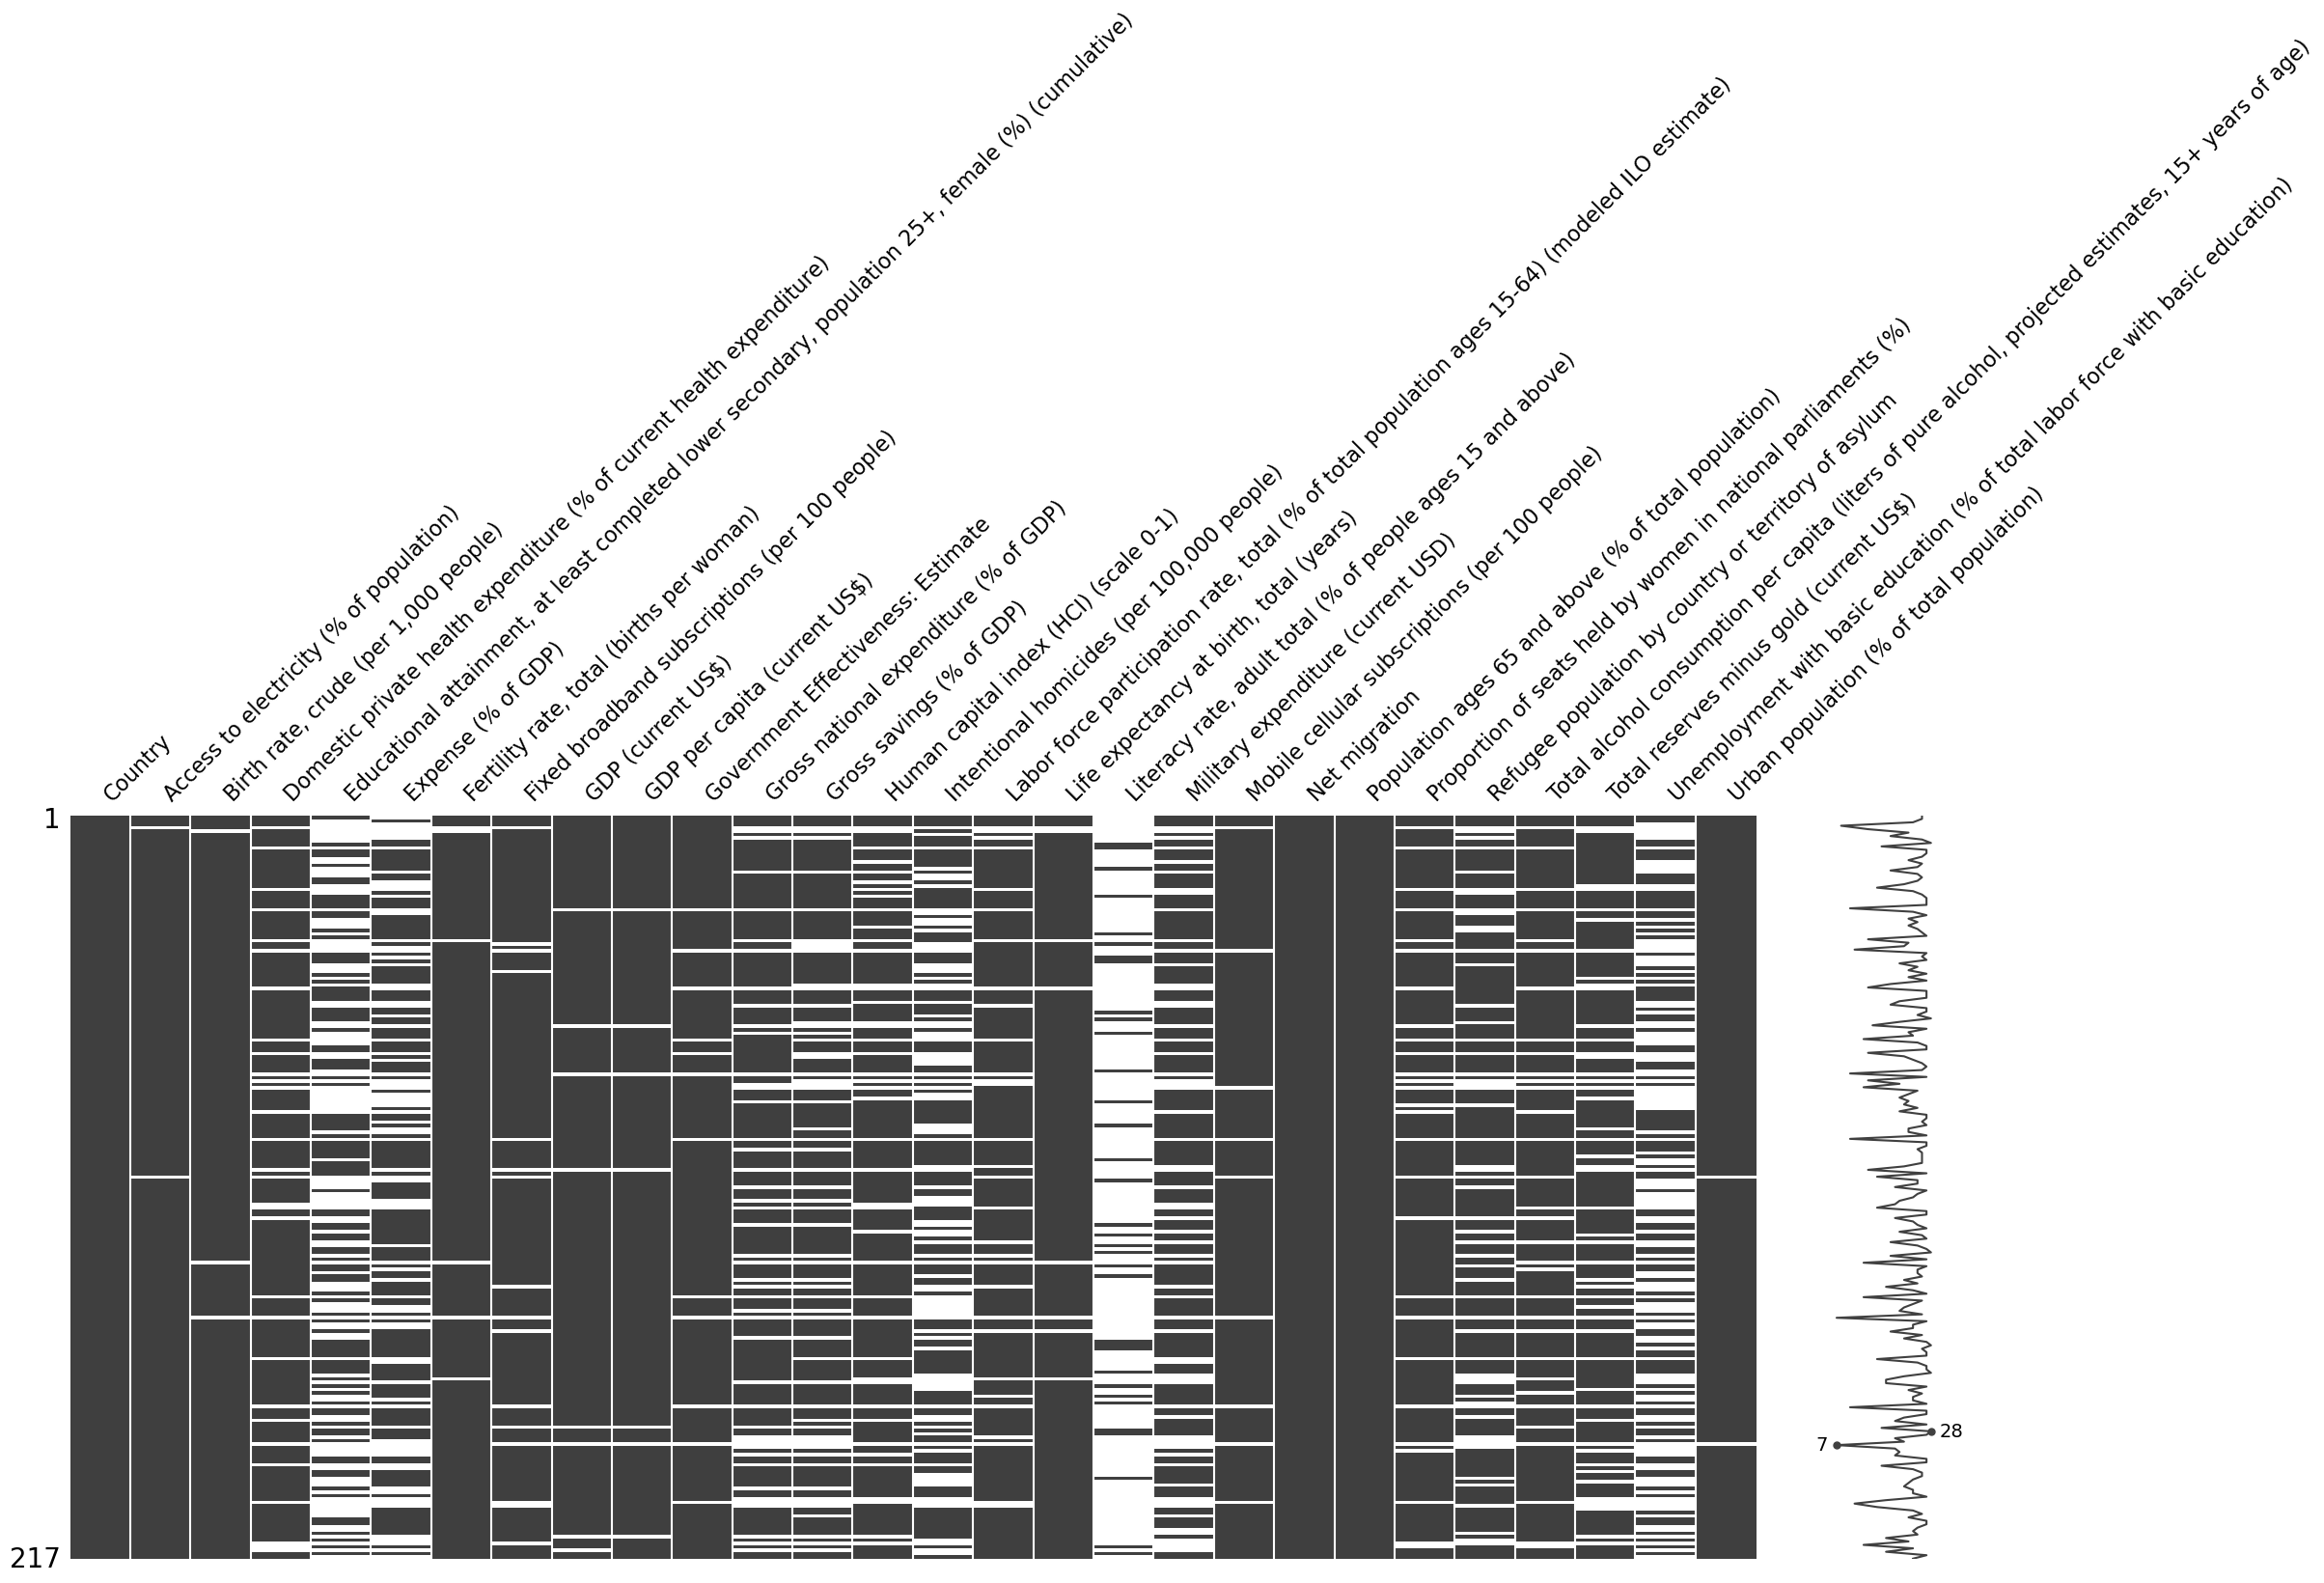

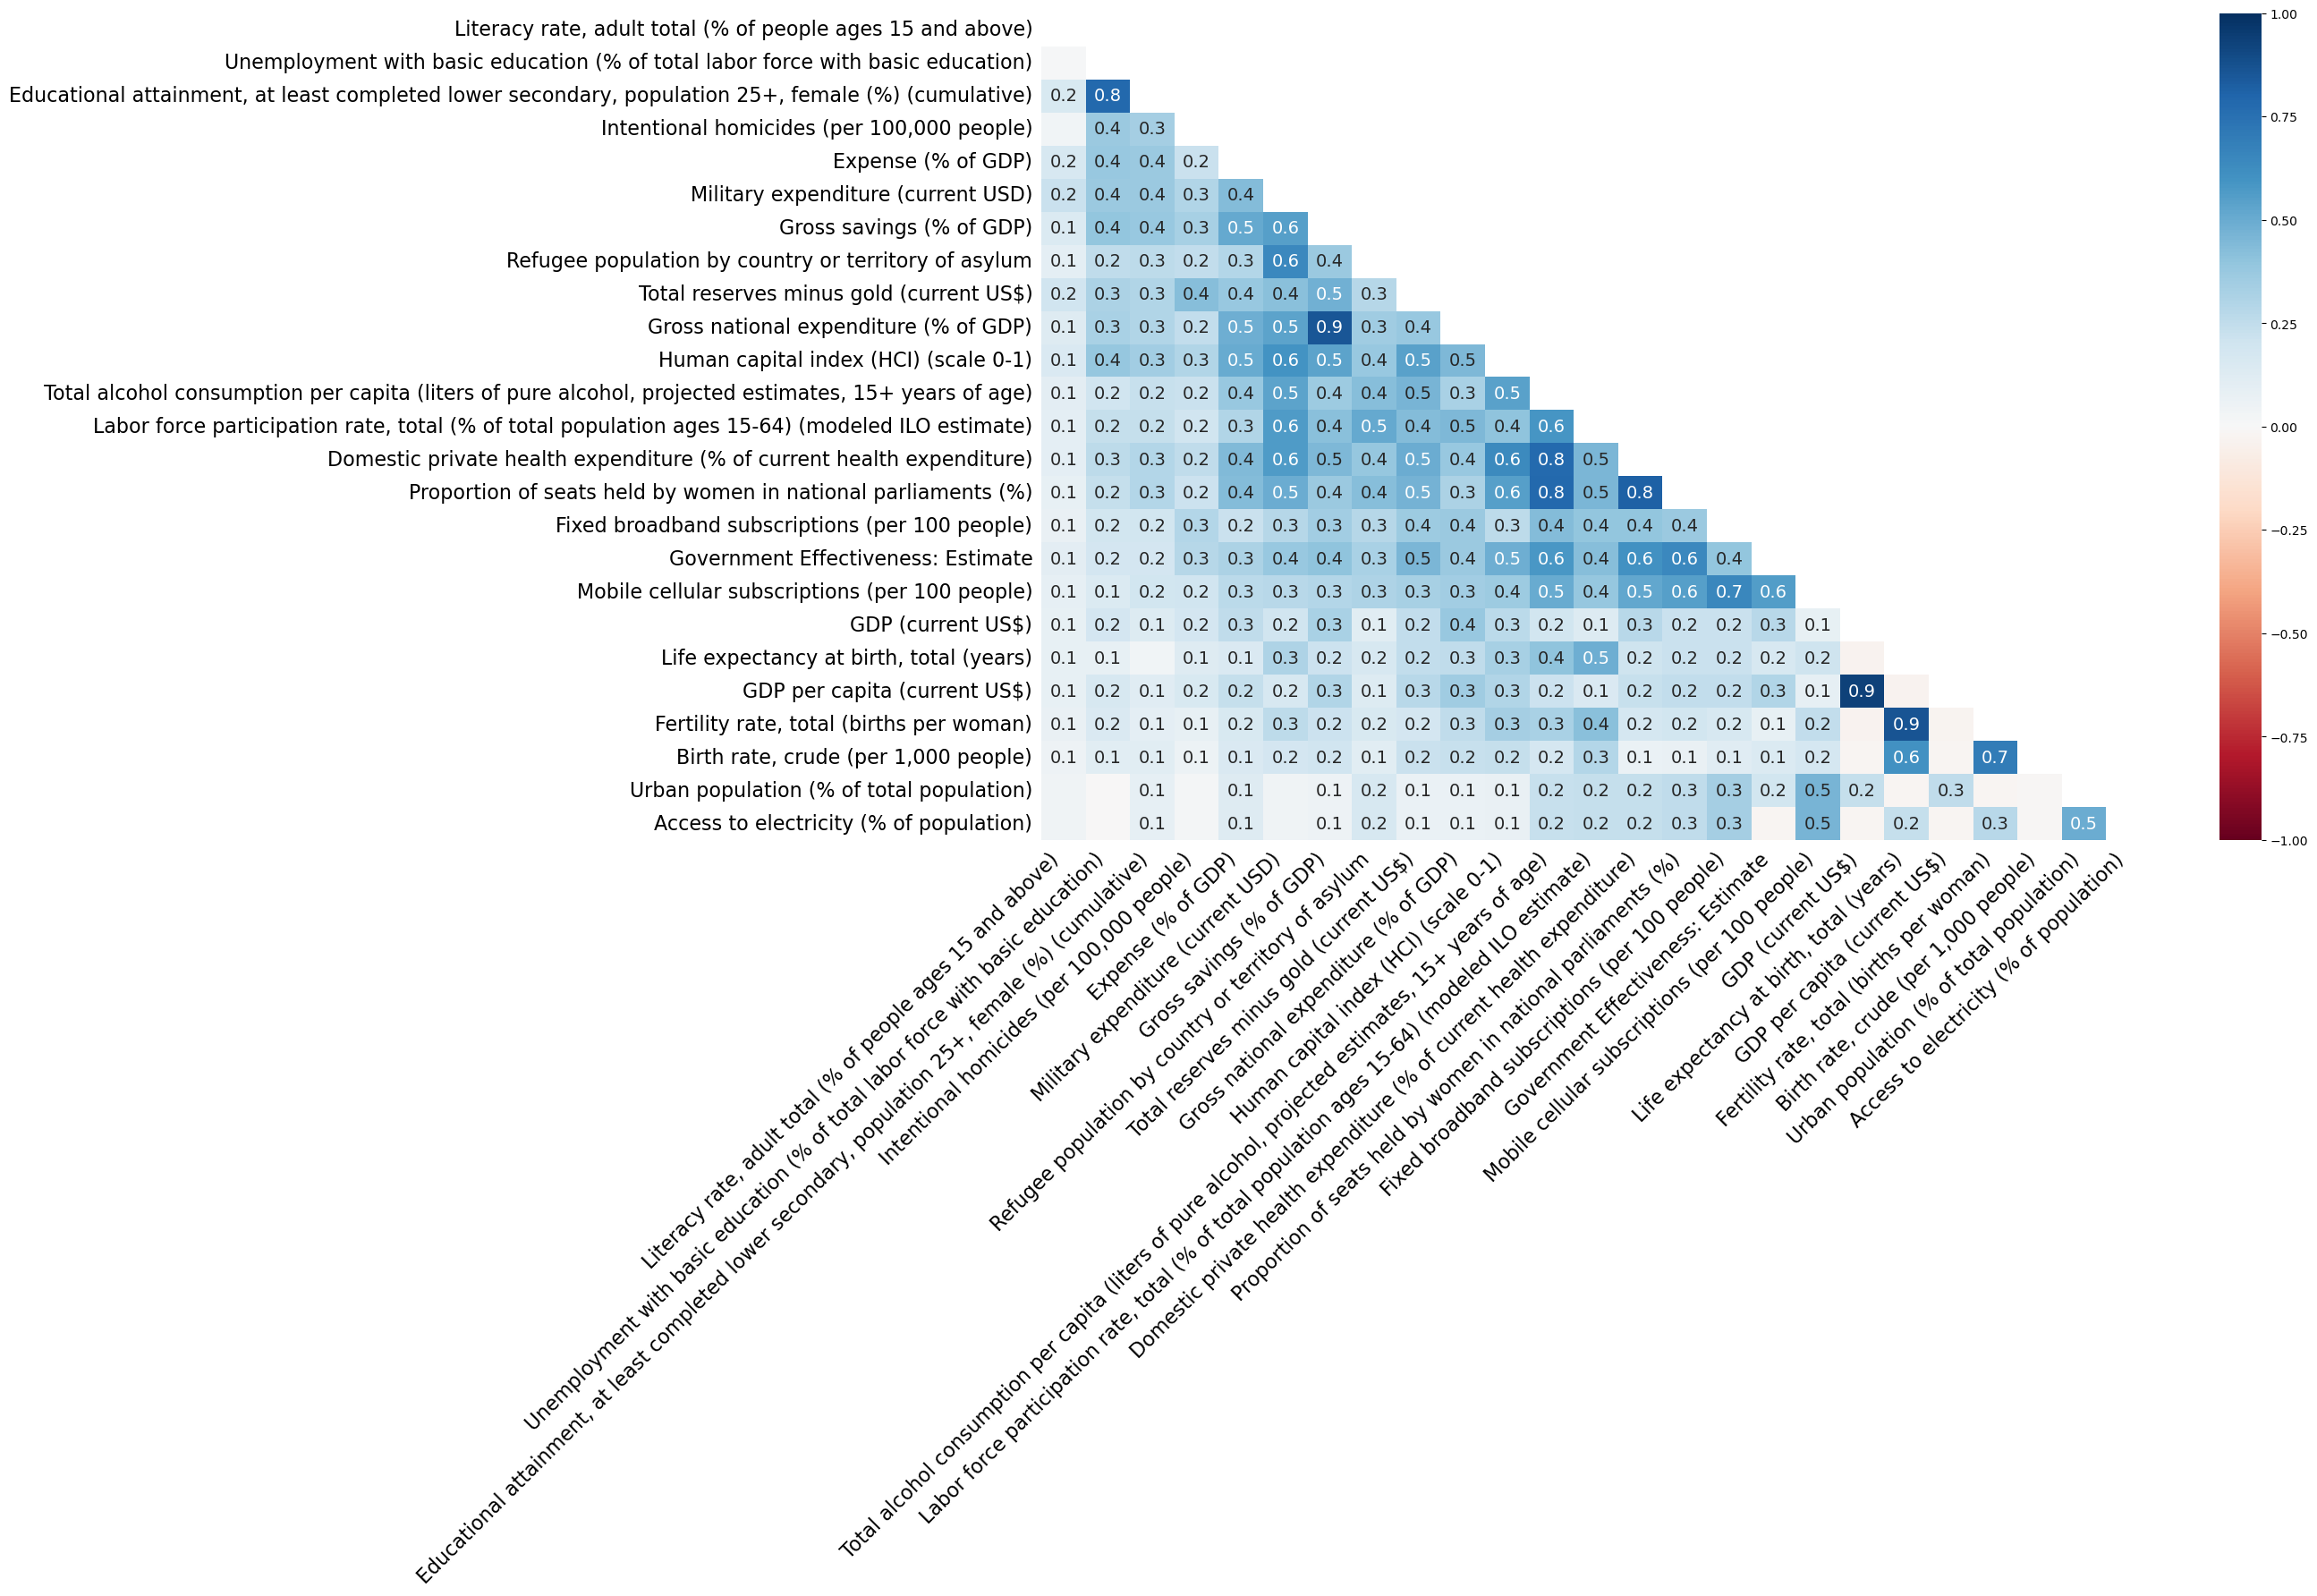

In [115]:
msno.matrix(data)
msno.heatmap(data, sort="ascending")

In [116]:
missing_values_df = world_bank.drop_missing_values_range(missing_percentage, 80)

Columns that was dropped: ['Literacy rate, adult total (% of people ages 15 and above)']


In [117]:
# Drop columns that are correlated with other values, since those columns are not giving any sense
corr_features_df = missing_values_df.drop(columns=[
    'Fertility rate, total (births per woman)',
    'GDP per capita (current US$)',
    'Educational attainment, at least completed lower secondary, population 25+, female (%) (cumulative)',
    'Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)'
])

<Axes: >

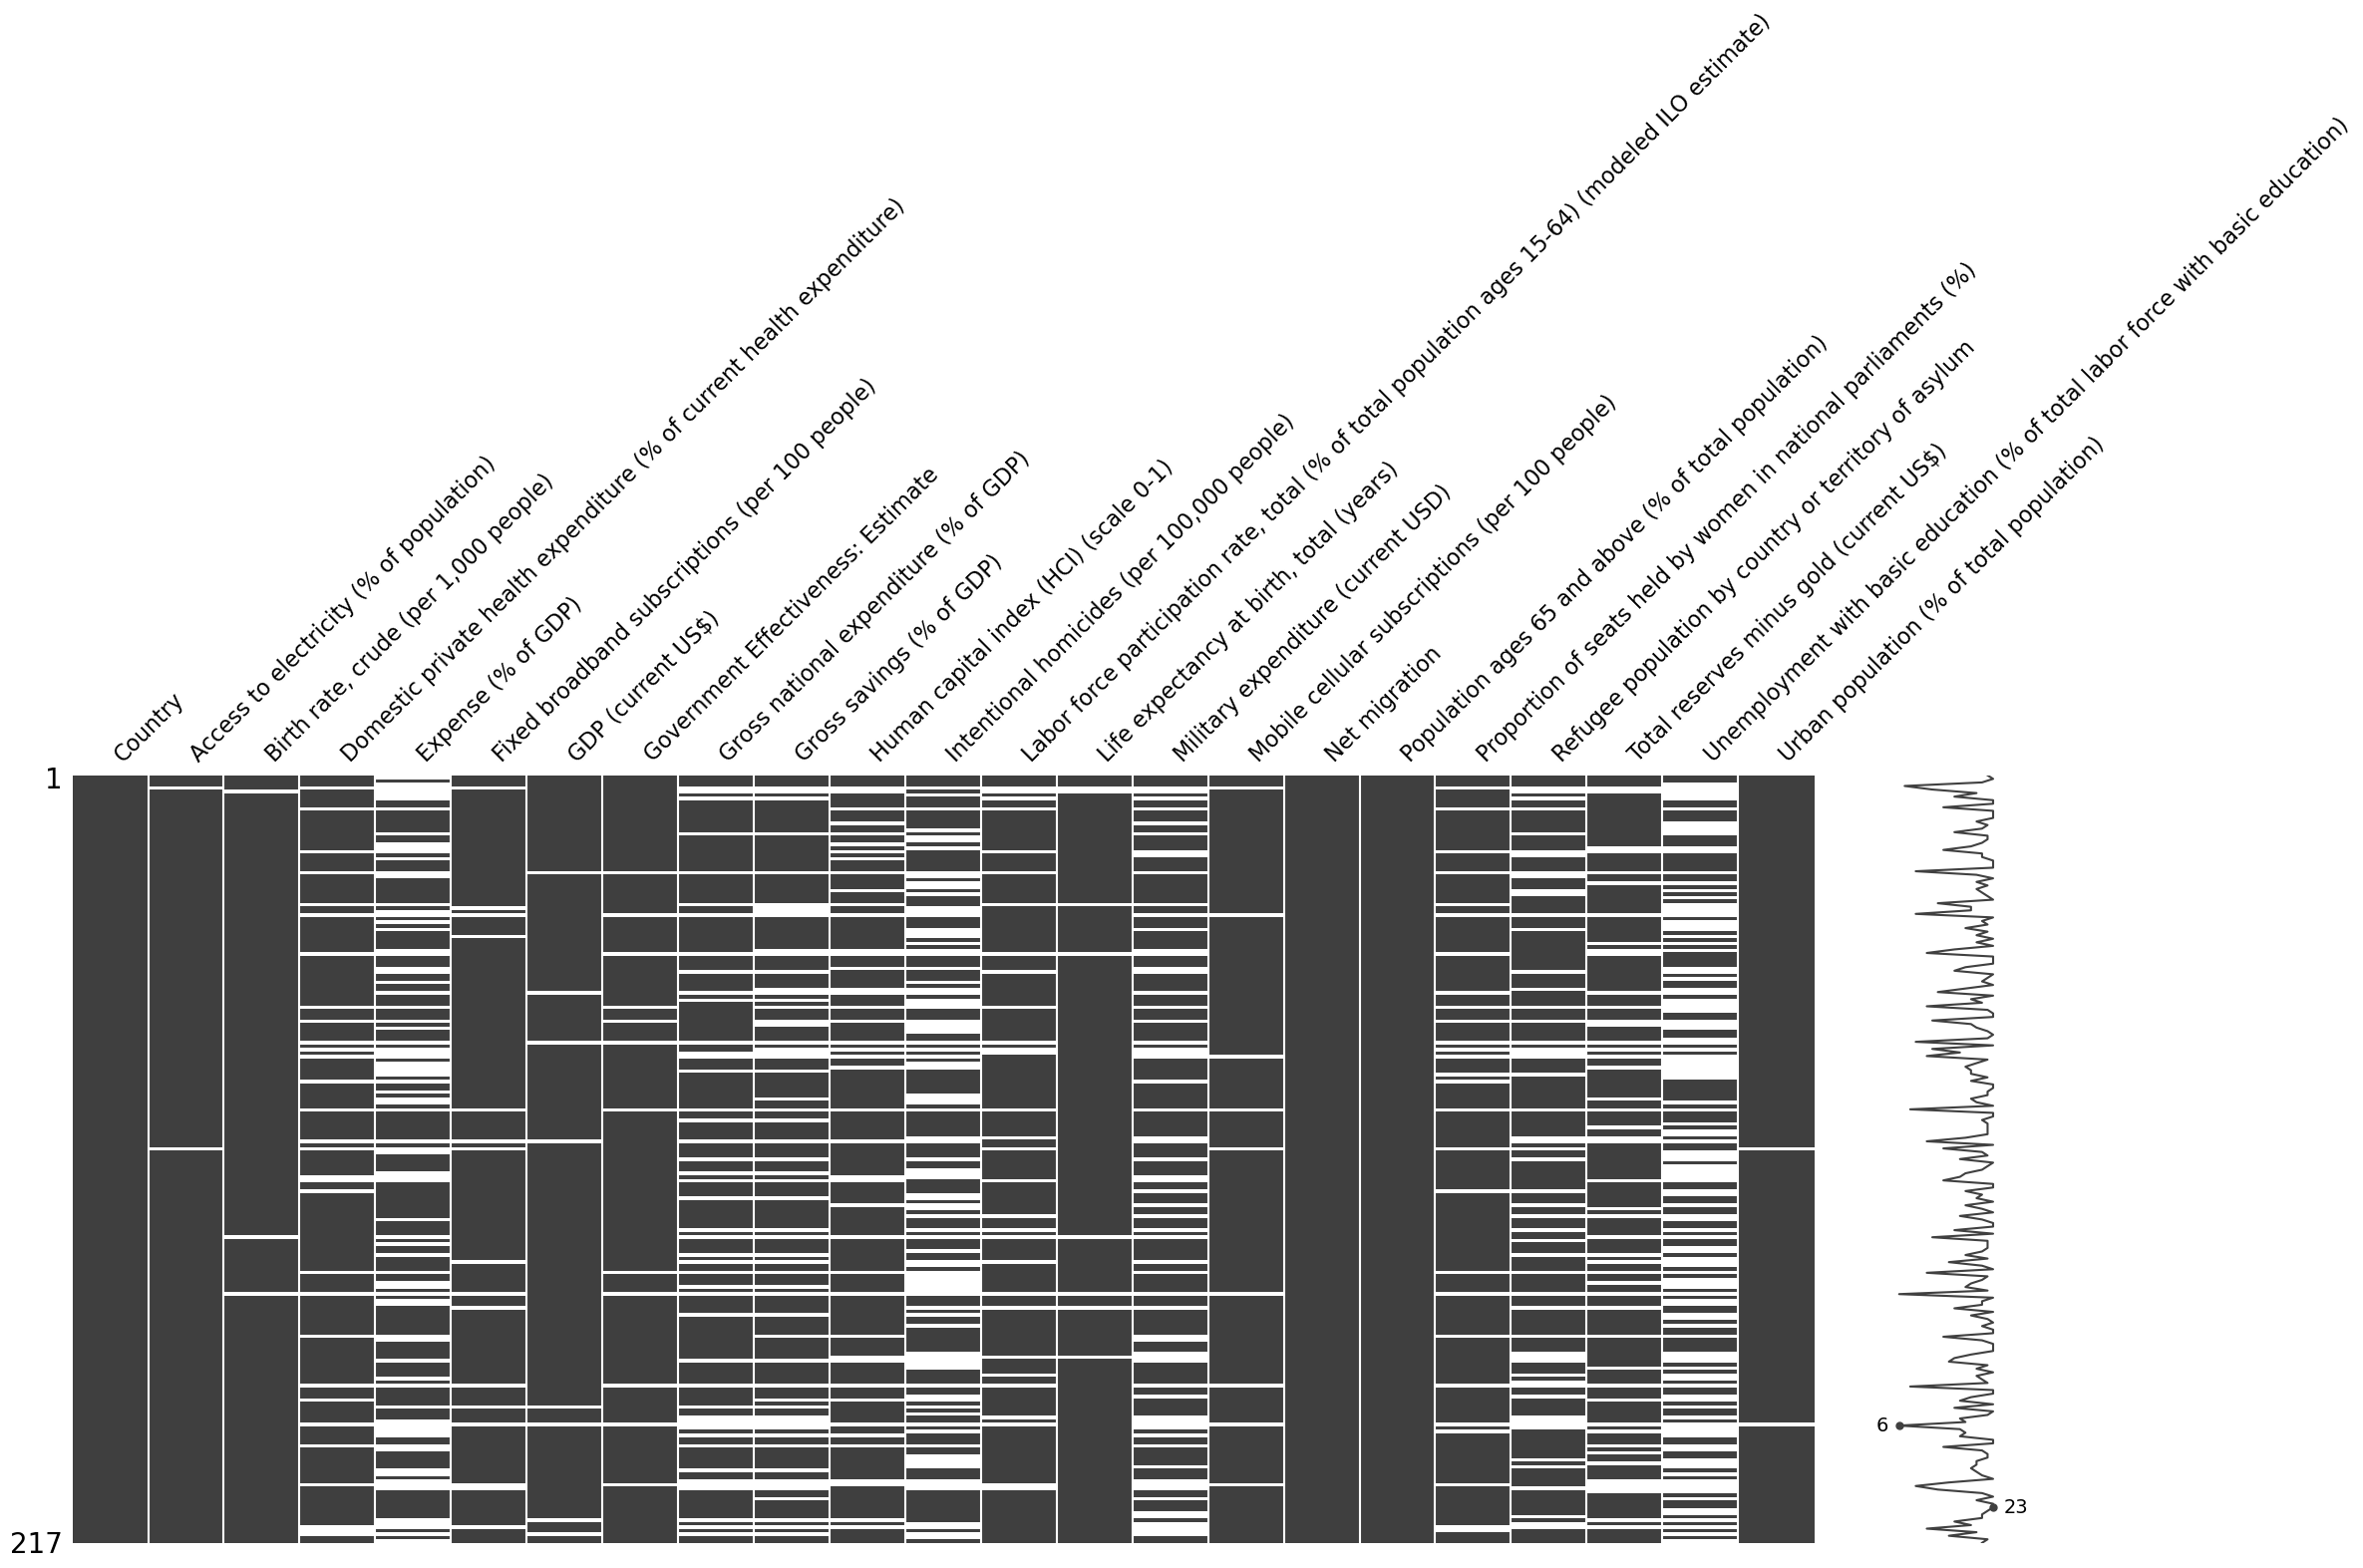

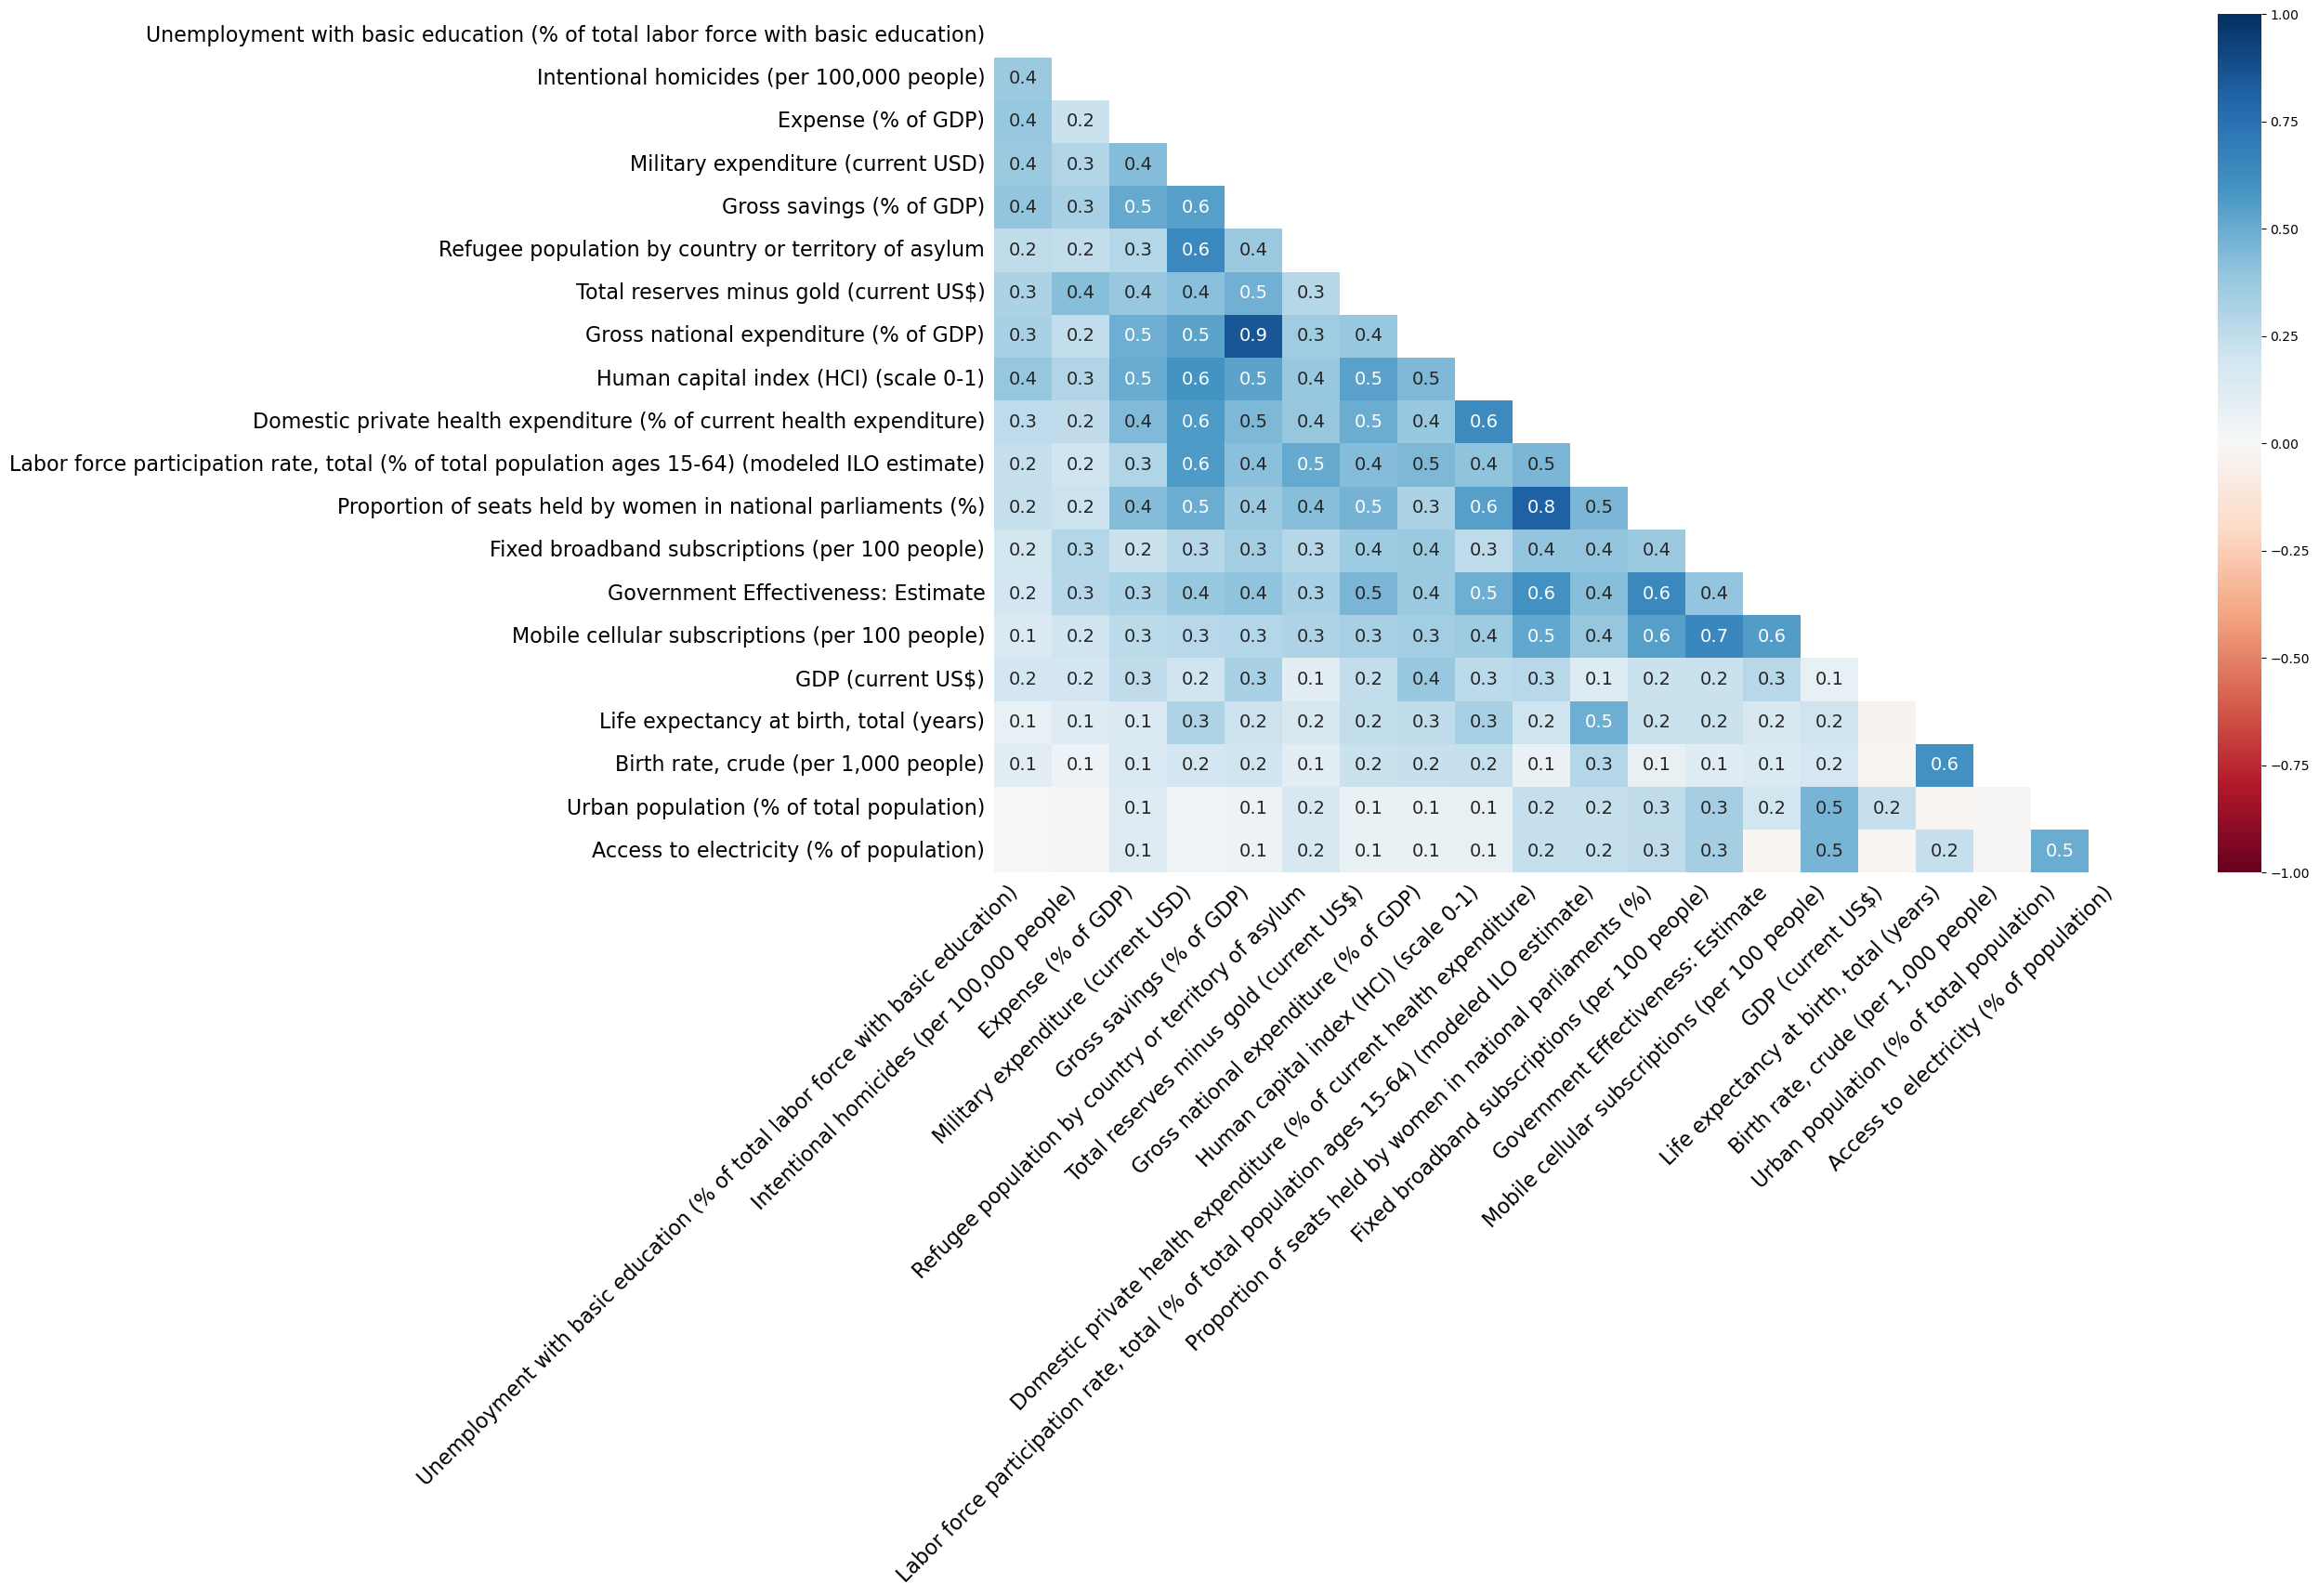

In [118]:
# Let's recheck after deleting whether everything is good
msno.matrix(corr_features_df)
msno.heatmap(corr_features_df, sort="ascending")

In [120]:
from sklearn.experimental.enable_iterative_imputer import IterativeImputer

# ------------------------------
# Missing Data Imputation with MICE (Iterative Imputer)
# ------------------------------

# Remove 'Country' column before imputation since it is categorical
cluster_cleaned2 = corr_features_df.drop(columns=['Country'])

# Initialize MICE imputer
mice_imputer = IterativeImputer(max_iter=25, random_state=42)

# Apply MICE imputation
cluster_imputed = mice_imputer.fit_transform(cluster_cleaned2)

# Convert imputed data back into a DataFrame
cluster_imputed_df = pd.DataFrame(cluster_imputed, columns=cluster_cleaned2.columns)

# Verify that missing values have been imputed
missing_data_after_imputation = cluster_imputed_df.isnull().mean().sort_values(ascending=False) * 100
print("Missing data after imputation:\n", missing_data_after_imputation)

Missing data after imputation:
 Access to electricity (% of population)                                                            0.0
Birth rate, crude (per 1,000 people)                                                               0.0
Unemployment with basic education (% of total labor force with basic education)                    0.0
Total reserves minus gold (current US$)                                                            0.0
Refugee population by country or territory of asylum                                               0.0
Proportion of seats held by women in national parliaments (%)                                      0.0
Population ages 65 and above (% of total population)                                               0.0
Net migration                                                                                      0.0
Mobile cellular subscriptions (per 100 people)                                                     0.0
Military expenditure (current USD)       

In [121]:

# ------------------------------
# Reintegrate 'Country' column back into the dataset
# ------------------------------
newdf = pd.concat([cluster_imputed_df, corr_features_df['Country']], axis=1)
newdf.head()

Access to electricity (% of population)  \
0                                97.700000   
1                               100.000000   
2                                99.700000   
3                               103.728215   
4                               100.000000   

   Birth rate, crude (per 1,000 people)  \
0                             36.051000   
1                             10.285000   
2                             22.431000   
3                             12.700000   
4                             10.079804   

   Domestic private health expenditure (% of current health expenditure)  \
0                                          76.231537                       
1                                          59.477894                       
2                                          38.965740                       
3                                          30.350023                       
4                                          27.383091                       

   Expense (% of GDP)  Fixed broadband subscriptions (per 100 people)  \
0           13.818972                                        0.068008   
1           24.604816                                       17.720900   
2           34.225216                                        8.606450   
3           37.009750                                       17.833230   
4           40.096404                                       48.656000   

   GDP (current US$)  Government Effectiveness: Estimate  \
0       1.995593e+10                           -1.611539   
1       1.524146e+10                           -0.155121   
2       1.650000e+11                           -0.573643   
3       7.210000e+08                            0.632649   
4       2.891001e+09                            1.749241   

   Gross national expenditure (% of GDP)  Gross savings (% of GDP)  \
0                             125.912567                 -2.737769   
1                             114.439197                 17.657214   
2                             109.319354                 33.337087   
3                             102.368262                 21.213869   
4                              93.689963                 21.208280   

   Human capital index (HCI) (scale 0-1)  ...  \
0                               0.400284  ...   
1                               0.634251  ...   
2                               0.534556  ...   
3                               0.615462  ...   
4                               0.762694  ...   

   Military expenditure (current USD)  \
0                        2.795770e+08   
1                        1.965963e+08   
2                        9.708277e+09   
3                       -1.233335e+09   
4                       -1.179043e+09   

   Mobile cellular subscriptions (per 100 people)  Net migration  \
0                                       58.190214       143634.0   
1                                       91.350501       -16680.0   
2                                      104.842178       -10798.0   
3                                      121.931550         -653.0   
4                                      103.449163          572.0   

   Population ages 65 and above (% of total population)  \
0                                           2.370734      
1                                          14.767004      
2                                           5.894089      
3                                           6.365363      
4                                          14.216852      

   Proportion of seats held by women in national parliaments (%)  \
0                                          27.016129               
1                                          29.508197               
2                                          25.757576               
3                                          23.763165               
4                                          46.428571               

   Refugee population by country or territory of asylum  \
0              

## Outlier Detection

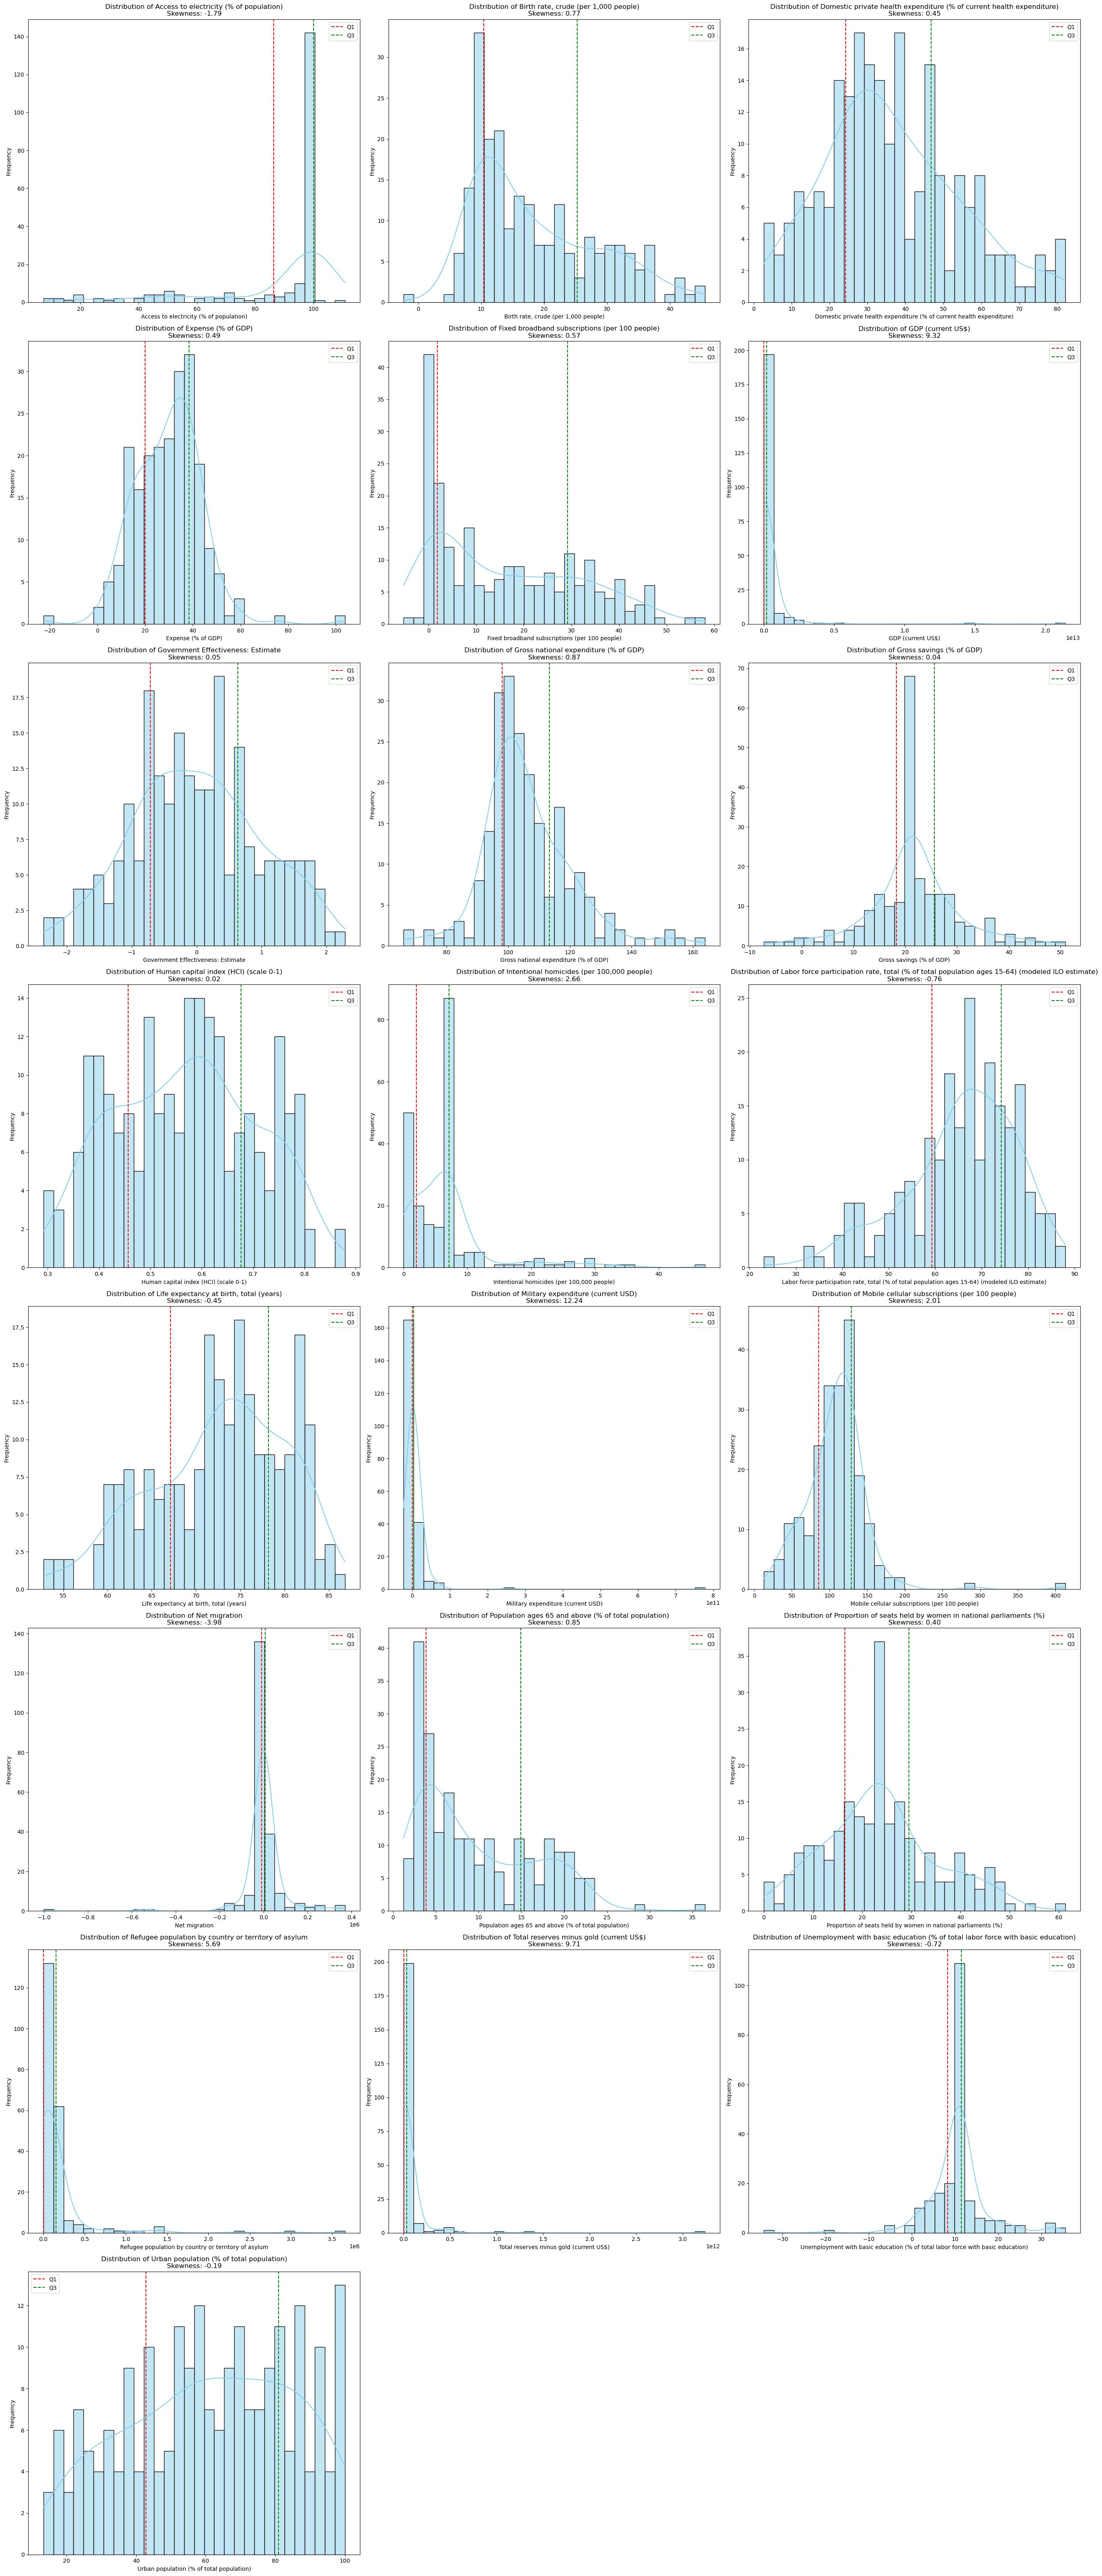

In [122]:
world_bank.visualize_iqr(newdf, 3)

If we will use IQR to remove outliers then it remove whole dataset, not good appraoch. However, we can use Box Cox

In [123]:
# showing skewness for each column Positive skewness: +0.8, Negative skewness: -0.7, Normal distribution in range 0
skewness = newdf.select_dtypes(include=['number']).skew()
print("Skewness for numeric columns:")
print(skewness)

Skewness for numeric columns:
Access to electricity (% of population)                                                            -1.792963
Birth rate, crude (per 1,000 people)                                                                0.770638
Domestic private health expenditure (% of current health expenditure)                               0.453676
Expense (% of GDP)                                                                                  0.488127
Fixed broadband subscriptions (per 100 people)                                                      0.565673
GDP (current US$)                                                                                   9.323896
Government Effectiveness: Estimate                                                                  0.051602
Gross national expenditure (% of GDP)                                                               0.865835
Gross savings (% of GDP)                                                                          

In [124]:
transformed_df, details = world_bank.apply_boxcox_for_skewed_columns(newdf, skew_threshold=1.0)


Transforming column: Access to electricity (% of population)
Box-Cox lambda: 3.7147
Initial skew: -1.7930
New skew: -1.1629
Column Birth rate, crude (per 1,000 people) skipped (skewness 0.7706 within threshold)
Column Domestic private health expenditure (% of current health expenditure) skipped (skewness 0.4537 within threshold)
Column Expense (% of GDP) skipped (skewness 0.4881 within threshold)
Column Fixed broadband subscriptions (per 100 people) skipped (skewness 0.5657 within threshold)

Transforming column: GDP (current US$)
Box-Cox lambda: -0.0033
Initial skew: 9.3239
New skew: 0.0008
Column Government Effectiveness: Estimate skipped (skewness 0.0516 within threshold)
Column Gross national expenditure (% of GDP) skipped (skewness 0.8658 within threshold)
Column Gross savings (% of GDP) skipped (skewness 0.0448 within threshold)
Column Human capital index (HCI) (scale 0-1) skipped (skewness 0.0236 within threshold)

Transforming column: Intentional homicides (per 100,000 people)

#### Let's recheck whether transformation was applied sucessfully

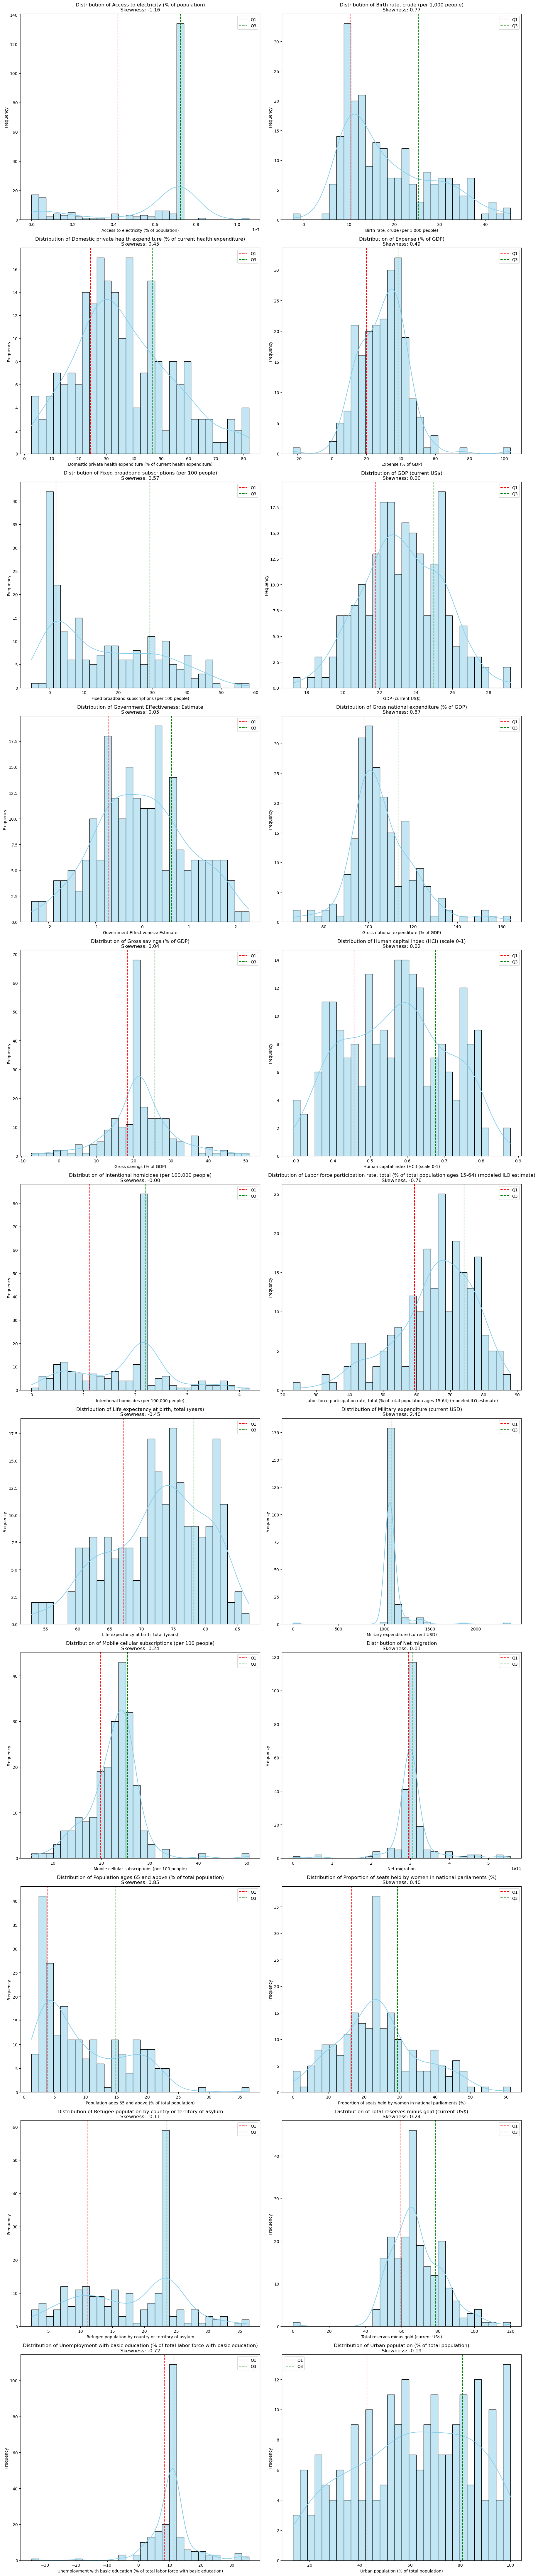

In [125]:
world_bank.visualize_iqr(transformed_df, 2)

## Feature Selection and Scaling